# โหลดข้อมูลและตรวจสอบเบื้องต้น

In [814]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = sns.load_dataset('titanic')
df.sample(5) # สุ่มเลือก5ตัวอย่าง

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
194,1,1,female,44.0,0,0,27.7208,C,First,woman,False,B,Cherbourg,yes,True
321,0,3,male,27.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
568,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
281,0,3,male,28.0,0,0,7.8542,S,Third,man,True,NaN,Southampton,no,True
692,1,3,male,NaN,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True


In [815]:
df.keys()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [816]:
df.info() # แสดงรายละเอียดข้อมูล

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [817]:
df.describe().round(2) # หาค่าสถิติเบื้องต้นทศนิยม 2 ตำแหน่ง

,survived,pclass,age,sibsp,parch,fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


# หา Missing data

In [818]:
df.isnull().sum()  # ตรวจหาข้อมูลที่สูญหาย

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [819]:
df.isnull().any() # ตรวจดูว่าcolumunใดมี missing data บ้าง ถ้ามีตอบ True ไม่มีจะตอบ False

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [820]:
# ตรวจสอบเปอร์เซ็นต์ของ Missing data
missing_count = df.isnull().sum() # จำนวนmissing data

total_cells = np.product(df.shape) # ผลคูณ ช่องข้อมูล = column * row
total_missing = missing_count.sum() # รวมจำนวนทั้งหมด
missing_percent = total_missing/total_cells *100

print('Total cells : {}'.format(total_cells))
print('Total missing values : {}'.format(total_missing))
print('Missing data overall : {}%'.format(missing_percent))

Total cells : 13365
Total missing values : 869
Missing data overall : 6.502057613168724%


# ตรวจสอบ Missing data แต่ละคอลัมน์

In [821]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

### การจัดการกับ Missing data มีหลายวิธี ในส่วนนี้ ใช้ 3 วิธี
- เติมข้อมูลด้วย ค่าเฉลี่ย หรือ ค่ากลางอื่น
- เติมข้อมูลหรือแทนที่ด้วยค่าใดค่าหนึ่ง
- ลบแถวหรือคอลัมน์นั้นทิ้งไปเลย (มีข้อเสียคือ ทำให้สูญเสียข้อมูลหายไป)

# พิจารณาการจัดการ Missing Data 

- จัดการ column โดยพิจารณาจาก missing values Ratio 

In [822]:
# ตรวจสอบเปอร์เซ็นต์ของ Missing data
# Embarked
missing_count = df.embarked.isnull().sum() # จำนวนmissing data

total_cells = np.product(df.embarked.shape) # ผลคูณ ช่องข้อมูล = column * row
total_missing = missing_count.sum() # รวมจำนวนทั้งหมด
missing_percent = total_missing/total_cells *100

print('Total cells : {}'.format(total_cells))
print('Total missing values : {}'.format(total_missing))
print('Missing data overall : {}%'.format(missing_percent))

Total cells : 891
Total missing values : 2
Missing data overall : 0.22446689113355783%


In [823]:
# embark_town
missing_count = df.embark_town.isnull().sum() # จำนวนmissing data

total_cells = np.product(df.embark_town.shape) # ผลคูณ ช่องข้อมูล = column * row
total_missing = missing_count.sum() # รวมจำนวนทั้งหมด
missing_percent = total_missing/total_cells *100
missing_percent = total_missing/total_cells *100
print('Embark_town')
print('Total cells : {}'.format(total_cells))
print('Total missing values : {}'.format(total_missing))
print('Missing data overall : {}%'.format(missing_percent))

Embark_town
Total cells : 891
Total missing values : 2
Missing data overall : 0.22446689113355783%


In [824]:
df.embarked[df.embarked.isnull()] #หาข้อมูลที่เป็น missing data คอลัมน์ embarked

61     NaN
829    NaN
Name: embarked, dtype: object

In [825]:
df.embark_town[df.embark_town.isnull()] #หาข้อมูลที่เป็น missing data คอลัมน์ embark_town

61     NaN
829    NaN
Name: embark_town, dtype: object

In [826]:
# คิดเป็น 0.22 % ตัดข้อมูลrow นี้ได้เกิด missing data ตำแหน่งเดียวกันด้วย
cols = ['embarked', 'embark_town']
df.dropna(subset=cols, inplace=True) # จัดการเฉพาะ Temp , Humid
df.isnull().any() 

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
adult_male     False
deck            True
embark_town    False
alive          False
alone          False
dtype: bool

#################### กลับมาดึงข้อมูลหัลงได้ model ที่ดีที่สุดแล้ว ####################

In [827]:
df_the_best_model = df

#################### กลับมาดึงข้อมูลหัลงได้ model ที่ดีที่สุดแล้ว ####################

In [828]:
# deck
missing_count = df.deck.isnull().sum() # จำนวนmissing data

total_cells = np.product(df.deck.shape) # ผลคูณ ช่องข้อมูล = column * row
total_missing = missing_count.sum() # รวมจำนวนทั้งหมด
missing_percent = total_missing/total_cells *100
print('Deck')
print('Total cells : {}'.format(total_cells))
print('Total missing values : {}'.format(total_missing))
print('Missing data overall : {}%'.format(missing_percent))

Deck
Total cells : 889
Total missing values : 688
Missing data overall : 77.39032620922384%


In [829]:
cols = ['deck']
df.drop(cols, axis='columns', inplace=True) # ลบคอลัมน์  deck ไป เพราะมีmissingdata เยอะเกินไป
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,Queenstown,no,True


- แทนที่ Missing data (age) ด้วยค่ากลาง

In [830]:
df.describe().round(2)

,survived,pclass,age,sibsp,parch,fare
count,889.00,889.00,712.00,889.00,889.00,889.00
mean,0.38,2.31,29.64,0.52,0.38,32.10
std,0.49,0.83,14.49,1.10,0.81,49.70
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.00,0.00,0.00,7.90
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


In [831]:
# เนื่องจาก อายุมี 'child' ณ column 'who' ด้วยการเติม median or mean ไปตรงๆ ไม่สมเหตุสมผล
df.who.unique()

array(['man', 'woman', 'child'], dtype=object)

In [832]:
# ควรเติมอายุเด็ก แยกจาก man and woman ตรวจสอบ % เด็กๆ
who_child = df.who[df.who=='child'].count()
print('who child = {} คน'.format(who_child))
print('{:.2f} %'.format(who_child /df.shape[0]*100))

who child = 83 คน
9.34 %


In [833]:
df_child = df[df.who == 'child'] # แยกเด็กออกมาหาค่ากลาง

In [834]:
df_child.describe().round(2)

,survived,pclass,age,sibsp,parch,fare
count,83.00,83.00,83.00,83.00,83.00,83.00
mean,0.59,2.63,6.37,1.73,1.27,32.79
std,0.49,0.62,4.73,1.64,0.68,33.47
min,0.00,1.00,0.42,0.00,0.00,7.22
25%,0.00,2.00,2.00,0.00,1.00,15.90
50%,1.00,3.00,5.00,1.00,1.00,26.25
75%,1.00,3.00,9.50,3.00,2.00,32.19
max,1.00,3.00,15.00,5.00,2.00,211.34


In [835]:
df_child.age.median() # ตรวจค่า median age
df_child.age.mean() # ตรวจค่า mean age

6.369518072289157

In [836]:
# เปลี่ยนข้อมูล woman and man เป็น adult
to_change = ['man', 'woman']
df.who.replace(to_change, 'adult', inplace=True)

In [837]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,adult,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,adult,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,adult,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,adult,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,adult,True,Southampton,no,True


In [838]:
# ดังนั้น column adult_male จึงไม่จำเป็น
df.drop('adult_male', axis='columns', inplace=True)

In [839]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,adult,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,adult,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,adult,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,adult,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,adult,Southampton,no,True


In [840]:
df_adult = df[df.who == 'adult'] # ผู้ใหญ่ออกมาหาค่ากลาง
df_adult.age.mean() # ตรวจค่า mean age adult

32.713036565977745

In [841]:
# เลือกใช้ค่า df_child.age.mean() แทน missing value ใน child
# เลือกใช้ค่า df_adult.age.mean() แทน missing value ใน adult
colm = 'age'# เลือกคอลัมน์ที่จะสนใจแทนที่ข้อมูล
if np.where(df['who']=='child'):
    df[colm] = df[colm].fillna(df_child.age.mean())
elif np.where(df['who']=='adult'):
     df[colm] = df[colm].fillna(df_adult.age.mean())
        
#df.head()
#df.describe().round(2)

In [842]:
# ตรวจดูยังมี na อยู่หรือไม่
df.isnull().any()

survived       False
pclass         False
sex            False
age            False
sibsp          False
parch          False
fare           False
embarked       False
class          False
who            False
embark_town    False
alive          False
alone          False
dtype: bool

In [843]:
# ตรวจสอบว่าเปลี่ยนสำเร็จไหม
df_child = df[df.who == 'child'] #
df_adult = df[df.who == 'adult'] # ผู้ใหญ่ออกมาหาค่ากลาง
print('mean age of adult :',df_adult.age.mean()) # ตรวจค่า mean age adult ต้องเท่ากับ 32.76782884310618 ไม่เท่าเดิมเพราะมี missiong values
print('mean age of child :',df_child.age.mean()) # ตรวจค่า mean age adult ต้องเท่ากับ 6.369518072289157 เท่าเดิมเพราะ ไม่มี missiong values 

mean age of adult : 26.92792146252512
mean age of child : 6.369518072289157


In [844]:
#กำจัด missing data สำเร็จ !!

# Data Cleansing 

- จัดการกับข้อมูลที่ซ้ำเกินความจำเป็น

In [845]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
embark_town      object
alive            object
alone              bool
dtype: object

In [846]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,embark_town,alive,alone
391,1,3,male,21.000000,0,0,7.7958,S,Third,adult,Southampton,yes,True
138,0,3,male,16.000000,0,0,9.2167,S,Third,adult,Southampton,no,True
390,1,1,male,36.000000,1,2,120.0000,S,First,adult,Southampton,yes,False
585,1,1,female,18.000000,0,2,79.6500,S,First,adult,Southampton,yes,False
359,1,3,female,6.369518,0,0,7.8792,Q,Third,adult,Queenstown,yes,True


In [847]:
# กำจัด column ที่ซ้ำ คือ class
col = ['class', 'alive']
df.drop(col, axis='columns', inplace=True) 

# Preprocessing

In [848]:
#ทำ labelencoding สำหรับ X (input)
from sklearn.preprocessing import LabelEncoder

def labelEncode(data, columns):
    for i in columns:
#         print(i)
        lb = LabelEncoder().fit_transform(data[i])
        data[i + '_'] = lb
        
columns =  ['pclass', 'sex', 'who', 'alone']
labelEncode(df, columns)

In [849]:
# ทำ label encoding สำหรับ y (Output)
y_le = LabelEncoder()
y = y_le.fit_transform(df.survived)

df['survived_'] = y
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,embark_town,alone,pclass_,sex_,who_,alone_,survived_
0,0,3,male,22.000000,1,0,7.2500,S,adult,Southampton,False,2,1,0,0,0
1,1,1,female,38.000000,1,0,71.2833,C,adult,Cherbourg,False,0,0,0,0,1
2,1,3,female,26.000000,0,0,7.9250,S,adult,Southampton,True,2,0,0,1,1
3,1,1,female,35.000000,1,0,53.1000,S,adult,Southampton,False,0,0,0,0,1
4,0,3,male,35.000000,0,0,8.0500,S,adult,Southampton,True,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,adult,Southampton,True,1,1,0,1,0
887,1,1,female,19.000000,0,0,30.0000,S,adult,Southampton,True,0,0,0,1,1
888,0,3,female,6.369518,1,2,23.4500,S,adult,Southampton,False,2,0,0,0,0
889,1,1,male,26.000000,0,0,30.0000,C,adult,Cherbourg,True,0,1,0,1,1


############################ ดึง y มาใช้ ###############################

############################ ดึง y มาใช้ ###############################

- เลือก Features ที่จะนำมา train โดยคัดกรองตัวแปร Low Variance

In [850]:
X_pp = df[['age', 'who_', 'sex_', 'sibsp', 'parch', 'alone_', 'fare', 'pclass_']]

In [851]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler as Scaler # Normalization 0-1 เพราะ Variance มีค่าต่างกันแต่ละตัวแปร
X = X_pp 
sc = Scaler()
X_sc = sc.fit_transform(X) # Normalization 0-1

df_sc = pd.DataFrame(X_sc, columns=X.columns) # เก็บ ที่ทำtransform แล้วลงในตัวแปร df_sc
df_sc.head().round(3)

,age,who_,sex_,sibsp,parch,alone_,fare,pclass_
0,0.271,0.0,1.0,0.125,0.0,0.0,0.014,1.0
1,0.472,0.0,0.0,0.125,0.0,0.0,0.139,0.0
2,0.321,0.0,0.0,0.000,0.0,1.0,0.015,1.0
3,0.435,0.0,0.0,0.125,0.0,0.0,0.104,0.0
4,0.435,0.0,1.0,0.000,0.0,1.0,0.016,1.0


- เลือก Feature ด้วย  Univariate Selction (category)

In [852]:
# ทำการ import ไลบรารี่และ fit ข้อมูลเพื่อเลือก features ที่ดีที่สุด
from sklearn.feature_selection import SelectKBest, chi2
test = SelectKBest(score_func = chi2, k=5) # กำหนดค่า k (จำนวนคอลัมน์ที่ต้องการ)
fit = test.fit(X_sc, y)

np.set_printoptions(precision = 3)
print(fit.scores_) # แสดง scores
features = fit.transform(X_sc)

[6.584e-03 1.519e+01 9.151e+01 2.989e-01 1.741e+00 1.505e+01 8.692e+00
 2.656e+01]


In [853]:
#จะได้ค่า Score ของแต่ละคอลัมน์และแสดงตัวอย่างข้อมูลที่ควรนำไปใช้
# หากต้องการเทียบข้อมูลให้ใช้
dfts = pd.DataFrame(fit.scores_, columns=['score'])
dfts['column'] = X.columns
dfts.sort_values(by= 'score', ascending=False)
df_sc = pd.DataFrame(X_sc, columns=X.columns) # เตรียม df_sc ไว้

In [854]:
# ควรตัด age, parch ออกไปถ้าต้องการลดให้เหลือ 5 column
cols_fts = dfts.sort_values(by='score', ascending=False).head(5).column # เรียงลำดับ 5 อันดับคะแนนสูงสุด
#cols_fts = dfts.nlargest(5, 'score').column # หรือใช้ nlargest
X_US_fts = df_sc[cols_fts].copy()
X_US_fts.shape #จะเหลือ 5 คอลัมน์
X_US_fts.sample(5) # จะได้ features ที่ใช้มี sex_,	pclass_, who_, alone_, fare

,sex_,pclass_,who_,alone_,fare
204,0.0,1.0,1.0,0.0,0.020421
210,0.0,0.5,0.0,1.0,0.040989
590,0.0,0.0,0.0,0.0,0.152766
670,1.0,0.0,0.0,0.0,0.101497
177,1.0,0.5,0.0,1.0,0.025374


- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination) 

เป็นเทคนิค Feature Selection ที่วนรอบการกำจัดเอา Feature ออกไป มีหลักการคือต้องการสร้าง Model classifier ตัวฐานก่อน จากนั้นทำการประเมิณ Features แล้วรายงานผลว่า Feature ตัวใดควรเอาไว้ ควรตัดทิ้ง

In [855]:
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC

model = LinearSVC() # สร้าง model classifier เพื่อประเมิณ feature ย่อยๆ
rfe = RFE(model, 5) # สร้าง RFE model และ เลือก 5 Features
rfe = rfe.fit(X_sc,y)

print(rfe.support_) # แสดงผลการประเมิณการเลือก Features
print(rfe.ranking_)

[False  True  True  True False False  True  True]
[3 1 1 1 2 4 1 1]


In [856]:
# 1(True) ควรเลือก Feature นั้นไว้
# ให้อ่าน features ที่เราควรเลือกไว้ใช่้
cols_fts = []
for i,cl in enumerate(X.columns):
    if rfe.support_[i] == True:
        cols_fts.append(cl)
cols_fts # แนะนำให้เลือก features เหล่านี้ไปใช้

['who_', 'sex_', 'sibsp', 'fare', 'pclass_']

In [857]:
# เลือกใช้งาน cols_fts
X_RFS_fts = df_sc[cols_fts]
X_RFS_fts.head()

,who_,sex_,sibsp,fare,pclass_
0,0.0,1.0,0.125,0.014151,1.0
1,0.0,0.0,0.125,0.139136,0.0
2,0.0,0.0,0.000,0.015469,1.0
3,0.0,0.0,0.125,0.103644,0.0
4,0.0,1.0,0.000,0.015713,1.0


In [858]:
X_US_fts.sample(5)

,sex_,pclass_,who_,alone_,fare
534,0.0,0.5,1.0,0.0,0.051237
77,1.0,0.5,1.0,0.0,0.056604
193,0.0,0.0,0.0,1.0,0.054107
144,1.0,0.5,0.0,0.0,0.071731
847,0.0,0.0,0.0,0.0,0.173920


In [859]:
# ลดสเกลของ X_US_fts /X_RFS_fts ด้วย Standard Scale
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # สร้าง Obj สำหรับทำ Standard Scale
X = X_RFS_fts
X_SDS = sc.fit_transform(X) # X_sc คือข้อมูลที่ทำการปรับสเกลแล้ว จะจัดอยู่ในรูป Matrix 

# นำ Matrix ไปสร้างเป็น Data Frame ด้วย Pandas
cols = ['SEX', 'PC', 'W', 'AL', 'F']
sc_df = pd.DataFrame(X_SDS, columns=cols)
sc_df.head() # ดูข้อมูลที่ลดสเกลแล้ว


,SEX,PC,W,AL,F
0,-0.320901,0.735342,0.431350,-0.500240,0.825209
1,-0.320901,-1.359911,0.431350,0.788947,-1.572211
2,-0.320901,-1.359911,-0.475199,-0.486650,0.825209
3,-0.320901,-1.359911,0.431350,0.422861,-1.572211
4,-0.320901,0.735342,-0.475199,-0.484133,0.825209


# เปรียบเทียบ model และ features แต่ละแบบ
- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination)

In [860]:
# ลดสเกลของ X_US_fts /X_RFS_fts ด้วย Standard Scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # สร้าง Obj สำหรับทำ Standard Scale
X = X_RFS_fts # 'who_', 'sex_', 'sibsp', 'fare', 'pclass_'
X_SDS = sc.fit_transform(X) # X_sc คือข้อมูลที่ทำการปรับสเกลแล้ว จะจัดอยู่ในรูป Matrix 

In [861]:
# นำ Matrix ไปสร้างเป็น Data Frame ด้วย Pandas
cols = ['SEX', 'PC', 'W', 'AL', 'F']
sc_df = pd.DataFrame(X_SDS, columns=cols)
sc_df.head() # ดูข้อมูลที่ลดสเกลแล้ว

,SEX,PC,W,AL,F
0,-0.320901,0.735342,0.431350,-0.500240,0.825209
1,-0.320901,-1.359911,0.431350,0.788947,-1.572211
2,-0.320901,-1.359911,-0.475199,-0.486650,0.825209
3,-0.320901,-1.359911,0.431350,0.422861,-1.572211
4,-0.320901,0.735342,-0.475199,-0.484133,0.825209


In [862]:
# แบ่งข้อมูล Train Test
from sklearn.model_selection import train_test_split
# แบ่งเป็น X y test train จาก X y โดยที่ test_size = 0.2 (train_size=0.8)
X_train, X_test,y_train,y_test = train_test_split(X_SDS,y,test_size=0.2,random_state=2020) 
from time import time

## 1. สำหรับ Decision Tree

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination) 

In [863]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
start = time() # เวลาเริ่มต้น train
model_DT.fit(X_train, y_train)
finish_RFE_DT = time() -start
print('{:.5f} sec'.format(finish_RFE_DT)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_DT, X, y, cv=10) # k=5
cvs_RFE_DT = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.00200 sec
Cross val scores [0.809 0.809 0.775 0.786 0.843 0.854 0.843 0.832 0.832 0.83 ]
mean 82.1157 %


## 2. สำหรับ Support Vector Machine

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination) 

In [864]:
from sklearn.svm import SVC
model_SVC = SVC()
start = time() # เวลาเริ่มต้น train
model_SVC.fit(X_train, y_train)
finish_RFE_SVC = time() -start
print('{:.5f} sec'.format(finish_RFE_SVC)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_SVC, X, y, cv=10) # k=5
cvs_RFE_SVC = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.01200 sec
Cross val scores [0.775 0.798 0.775 0.865 0.82  0.786 0.798 0.764 0.843 0.841]
mean 80.6563 %


## 3. สำหรับ Naive Bayes

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination)

In [865]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
model_NB = GaussianNB() # Naive Bayes
start = time() # เวลาเริ่มต้น train
model_NB.fit(X_train, y_train) # Train สร้าง model
finish_RFE_NB = time() -start
print('{:.5f} sec'.format(finish_RFE_NB)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_NB, X, y, cv=10) # precision
cvs_RFE_NB = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4))) 
print('mean {:.4f} %'.format(cvs.mean()*100)) 

0.00200 sec
Cross val scores [0.798 0.798 0.786 0.832 0.798 0.809 0.786 0.764 0.809 0.841]
mean 80.2068 %


## 4. สำหรับ k-Nearest Neighbors

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination)

In [866]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier() #ตั้งค่า model n_neighbors = 1,2,3
start = time() # เวลาเริ่มต้น train
model_KNN.fit(X_train, y_train) # Train สร้าง model
finish_RFE_kNN = time() -start
print('{:.5f} sec'.format(finish_RFE_kNN)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_KNN, X, y, cv=10) # k=5
cvs_RFE_kNN = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.00200 sec
Cross val scores [0.764 0.843 0.742 0.809 0.899 0.742 0.775 0.764 0.854 0.807]
mean 79.9783 %


## 5. สำหรับ Random Forest

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination)

In [867]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier() # n_estimators = จำนวนต้นไม้ที่ต้องการสร้าง
start = time() # เวลาเริ่มต้น train
model_RFC.fit(X_train, y_train) # Train สร้าง model
finish_RFE_RF = time() -start
print('{:.5f} sec'.format(finish_RFE_RF)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_RFC, X, y, cv=10) # k=5
cvs_RFE_RF = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.16701 sec
Cross val scores [0.786 0.764 0.764 0.809 0.865 0.865 0.832 0.854 0.854 0.784]
mean 81.7735 %


## 6. สำหรับ Logistic Regression

- การเลือกด้วยวิธีเวียนกำจัด RFE (Recursive Feature Elimination)

In [868]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression() # n_estimators = จำนวนต้นไม้ที่ต้องการสร้าง
start = time() # เวลาเริ่มต้น train
model_LR.fit(X_train, y_train) # Train สร้าง model
finish_RFE_LR = time() -start
print('{:.5f} sec'.format(finish_RFE_LR)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_LR, X, y, cv=10) # k=5
cvs_RFE_LR = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.00400 sec
Cross val scores [0.832 0.775 0.786 0.843 0.82  0.798 0.764 0.742 0.832 0.784]
mean 79.7510 %


# เปรียบเทียบ model และ features แต่ละแบบ
- การเลือกFeatures ด้วยวิธี  Univariate Selection (category)

In [869]:
# ลดสเกลของ X_US_fts /X_RFS_fts ด้วย Standard Scale
from sklearn.preprocessing import StandardScaler
from time import time
sc = StandardScaler() # สร้าง Obj สำหรับทำ Standard Scale
X = X_US_fts # 'sex_', 'pclass_', 'who_', 'alone_', 'fare'
X_SDS = sc.fit_transform(X) # X_sc คือข้อมูลที่ทำการปรับสเกลแล้ว จะจัดอยู่ในรูป Matrix 

In [870]:
# นำ Matrix ไปสร้างเป็น Data Frame ด้วย Pandas
cols = ['SEX', 'PC', 'W', 'AL', 'F']
sc_df = pd.DataFrame(X_SDS, columns=cols)
sc_df.head() # ดูข้อมูลที่ลดสเกลแล้ว

,SEX,PC,W,AL,F
0,0.735342,0.825209,-0.320901,-1.229349,-0.500240
1,-1.359911,-1.572211,-0.320901,-1.229349,0.788947
2,-1.359911,0.825209,-0.320901,0.813439,-0.486650
3,-1.359911,-1.572211,-0.320901,-1.229349,0.422861
4,0.735342,0.825209,-0.320901,0.813439,-0.484133


In [871]:
# แบ่งข้อมูล Train Test
from sklearn.model_selection import train_test_split
# แบ่งเป็น X y test train จาก X y โดยที่ test_size = 0.2 (train_size=0.8)
X_train, X_test,y_train,y_test = train_test_split(X_SDS,y,test_size=0.2,random_state=2020) 

## 1. สำหรับ Decision Tree

In [872]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier()
start = time() # เวลาเริ่มต้น train
model_DT.fit(X_train, y_train)
finish_US_DT = time() -start
print('{:.5f} sec'.format(finish_US_DT)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_DT, X, y, cv=10) # k=5
cvs_US_DT = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.00201 sec
Cross val scores [0.798 0.832 0.764 0.764 0.865 0.82  0.854 0.832 0.832 0.818]
mean 81.7773 %


## 2. สำหรับ Support Vector Machine

In [873]:
from sklearn.svm import SVC
model_SVC = SVC()
start = time() # เวลาเริ่มต้น train
model_SVC.fit(X_train, y_train)
finish_US_SVC = time() -start
print('{:.5f} sec'.format(finish_US_SVC)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_SVC, X, y, cv=10) # k=5
cvs_US_SVC = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.00900 sec
Cross val scores [0.832 0.809 0.764 0.854 0.854 0.764 0.809 0.775 0.865 0.807]
mean 81.3266 %


## 3. สำหรับ Naive Bayes

In [874]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
model_NB = GaussianNB() # Naive Bayes
start = time() # เวลาเริ่มต้น train
model_NB.fit(X_train, y_train) # Train สร้าง model
finish_US_NB = time() -start
print('{:.5f} sec'.format(finish_US_NB)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_NB, X, y, cv=10) # precision
cvs_US_NB = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4))) 
print('mean {:.4f} %'.format(cvs.mean()*100)) 

0.00100 sec
Cross val scores [0.652 0.775 0.742 0.82  0.753 0.832 0.764 0.708 0.798 0.807]
mean 76.4951 %


## 4. สำหรับ k-Nearest Neighbors

In [875]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier() #ตั้งค่า model n_neighbors = 1,2,3
start = time() # เวลาเริ่มต้น train
model_KNN.fit(X_train, y_train) # Train สร้าง model
finish_US_kNN = time() -start
print('{:.5f} sec'.format(finish_US_kNN)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_KNN, X, y, cv=10) # k=5
cvs_US_kNN = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.00200 sec
Cross val scores [0.764 0.809 0.764 0.832 0.899 0.832 0.854 0.809 0.865 0.852]
mean 82.7924 %


## 5. สำหรับ  Random Forest

In [876]:
from sklearn.ensemble import RandomForestClassifier

model_RFC = RandomForestClassifier() # n_estimators = จำนวนต้นไม้ที่ต้องการสร้าง
start = time() # เวลาเริ่มต้น train
model_RFC.fit(X_train, y_train) # Train สร้าง model
finish_US_RF = time() -start
print('{:.5f} sec'.format(finish_US_RF)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_RFC, X, y, cv=10) # k=5
cvs_US_RF = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.15101 sec
Cross val scores [0.786 0.786 0.742 0.786 0.876 0.832 0.843 0.82  0.832 0.795]
mean 80.9883 %


## 6. สำหรับ Logistic Regression

In [877]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression() # n_estimators = จำนวนต้นไม้ที่ต้องการสร้าง
start = time() # เวลาเริ่มต้น train
model_LR.fit(X_train, y_train) # Train สร้าง model
finish_US_LR = time() -start
print('{:.5f} sec'.format(finish_US_LR)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_LR, X, y, cv=10) # k=5
cvs_US_LR = cvs.mean()*100
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.00400 sec
Cross val scores [0.809 0.798 0.764 0.854 0.798 0.786 0.764 0.742 0.809 0.773]
mean 78.9632 %


In [878]:
# สร้างตารางสรุปคะแนนเพื่อเลือก model และ Feature selection
Feature_selection_types = [
                            'Recursive_Feature_Elimination', 'Recursive_Feature_Elimination', 'Recursive_Feature_Elimination', 'Recursive_Feature_Elimination', 'Recursive_Feature_Elimination', 'Recursive_Feature_Elimination',
                            'Univariate_Selection', 'Univariate_Selection','Univariate_Selection','Univariate_Selection','Univariate_Selection','Univariate_Selection'
                          ]
cross_val_score = [
                    cvs_RFE_DT, cvs_RFE_SVC, cvs_RFE_NB, cvs_RFE_kNN, cvs_RFE_RF, cvs_RFE_LR,
                    cvs_US_DT, cvs_US_SVC, cvs_US_NB, cvs_US_kNN, cvs_US_RF, cvs_US_LR
                  ]
time_score = [
                finish_RFE_DT, finish_RFE_SVC, finish_RFE_NB, finish_RFE_kNN, finish_RFE_RF, finish_RFE_LR,
                finish_US_DT, finish_US_SVC, finish_US_NB, finish_US_kNN, finish_US_RF, finish_US_LR
             ]
algorithm_types = ['Decision Tree', 'Support Vector Machine', 'Naive Bayes', 'k-Nearest Neighbors',
                   'Random Forest', 'Logistic Regression',
                  'Decision Tree', 'Support Vector Machine', 'Naive Bayes', 'k-Nearest Neighbors',
                   'Random Forest', 'Logistic Regression']
col_names = ['Algorithm', 'Feature selection', 'Cross validation score(means)', 'Times']

In [879]:
import pandas as pd
algorithm_types_series = pd.Series(algorithm_types)
Feature_selection_types_series = pd.Series(Feature_selection_types)
cross_val_score_series = pd.Series(cross_val_score)
time_score_series = pd.Series(time_score)
datas = zip(algorithm_types_series, Feature_selection_types_series, cross_val_score_series, time_score_series)
df = pd.DataFrame(datas , columns = col_names)

In [880]:
df

,Algorithm,Feature selection,Cross validation score(means),Times
0,Decision Tree,Recursive_Feature_Elimination,82.115679,0.002002
1,Support Vector Machine,Recursive_Feature_Elimination,80.656282,0.012000
2,Naive Bayes,Recursive_Feature_Elimination,80.206844,0.002002
3,k-Nearest Neighbors,Recursive_Feature_Elimination,79.978294,0.001999
4,Random Forest,Recursive_Feature_Elimination,81.773493,0.167013
5,Logistic Regression,Recursive_Feature_Elimination,79.751021,0.003999
6,Decision Tree,Univariate_Selection,81.777324,0.002006
7,Support Vector Machine,Univariate_Selection,81.326609,0.008998
8,Naive Bayes,Univariate_Selection,76.495148,0.000998
9,k-Nearest Neighbors,Univariate_Selection,82.792390,0.002002


# ทำ Bar plot เทียบแต่ละ Algorithm

In [881]:
# ทำการ import library สร้าง list model แล้ว loop ประเมินด้วย Cross Validation
# ทำการ import library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [882]:
# สร้าง list model
models = []
models.append(('LR', LogisticRegression()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

In [883]:
#  loop ประเมินด้วย Cross Validation
from sklearn.model_selection import cross_val_score

results = []
names = []
X = X_RFS_fts
for name, model in models:
    cvs = cross_val_score(model, X, y, cv=10)
    names.append(name) # เอาตัวแปร name ไปเก็บชื่อโมเดลจาก models
    cvs = cross_val_score(model, X, y, cv=10) # ตัวแปร model เก็บค่ามาจาก models ลำดับที่ 2 เช่น naemeเก็บ'LR' และ model เก็บ LogisticRegression()
    results.append(cvs) # เอาผล cvs ที่คำนวณได้เก็บไว้ใน results
    print('{:4} {:.3f} ({:.3f})'.format(name, cvs.mean(), cvs.std())) 

LR   0.798 (0.031)
kNN  0.800 (0.050)
NB   0.802 (0.021)
SVC  0.807 (0.032)
RFC  0.818 (0.046)
DT   0.819 (0.027)


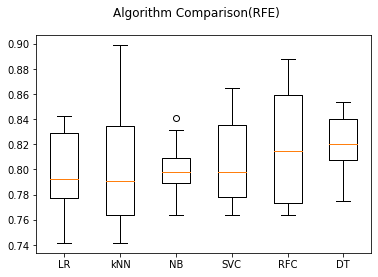

In [884]:
# พล็อตกราฟ boxplot เพื่อเลือก Best of algorithm
fig = plt.figure()
fig.suptitle('Algorithm Comparison(RFE) ')
ax = fig.add_subplot(111) # row column id
plt.boxplot(results) # plot box plot
ax.set_xticklabels(names) # label ชื่อ แกน x
plt.show()

In [885]:
#  loop ประเมินด้วย Cross Validation
from sklearn.model_selection import cross_val_score

results = []
names = []
X = X_US_fts
for name, model in models:
    cvs = cross_val_score(model, X, y, cv=10)
    names.append(name) # เอาตัวแปร name ไปเก็บชื่อโมเดลจาก models
    cvs = cross_val_score(model, X, y, cv=10) # ตัวแปร model เก็บค่ามาจาก models ลำดับที่ 2 เช่น naemeเก็บ'LR' และ model เก็บ LogisticRegression()
    results.append(cvs) # เอาผล cvs ที่คำนวณได้เก็บไว้ใน results
    print('{:4} {:.3f} ({:.3f})'.format(name, cvs.mean(), cvs.std())) 

LR   0.790 (0.030)
kNN  0.828 (0.041)
NB   0.765 (0.052)
SVC  0.813 (0.036)
RFC  0.808 (0.038)
DT   0.818 (0.030)


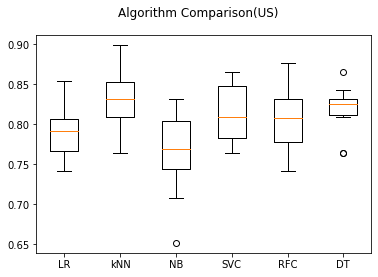

In [886]:
# พล็อตกราฟ boxplot เพื่อเลือก Best of algorithm
fig = plt.figure()
fig.suptitle('Algorithm Comparison(US)')
ax = fig.add_subplot(111) # row column id
plt.boxplot(results) # plot box plot
ax.set_xticklabels(names) # label ชื่อ แกน x
plt.show()

- จากตาราง cross validation score และ time score การใช้ Feature selection ควรใช้ Feature selection: Univariate Selection
- 'sex_', 'pclass_', 'who_', 'alone_', 'fare'
- จากตาราง bar plot การเลือกใช้ algorithm ควรใช้ kNN(ให้ cross val score :82.79%, ) ซึ่งดีที่สุดเมื่อเทียบกับ Algorithm อื่นๆ

# หาค่า parameter ด้วย Grid Randomized

In [887]:
# Train model ใหม่โดยใช้ข้อมูลที่เลือก feature sex, pclass, who, alone, fare

In [888]:
# Architecture the best model
from sklearn.neighbors import KNeighborsClassifier

model_best_kNN =  KNeighborsClassifier(algorithm='ball_tree', leaf_size=47, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=8, p=6,
                     weights='uniform')

In [889]:
df_the_best_model.head() # ดึงข้อมูลเก่ามา train model

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,embark_town,alone,pclass_,sex_,who_,alone_,survived_
0,0,3,male,22.0,1,0,7.2500,S,adult,Southampton,False,2,1,0,0,0
1,1,1,female,38.0,1,0,71.2833,C,adult,Cherbourg,False,0,0,0,0,1
2,1,3,female,26.0,0,0,7.9250,S,adult,Southampton,True,2,0,0,1,1
3,1,1,female,35.0,1,0,53.1000,S,adult,Southampton,False,0,0,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,adult,Southampton,True,2,1,0,1,0


In [890]:
US_cols = ['sex', 'pclass', 'who', 'alone', 'fare']
df_the_best_model_US = df_the_best_model[US_cols]

In [891]:
df_the_best_model_US.head()

,sex,pclass,who,alone,fare
0,male,3,adult,False,7.2500
1,female,1,adult,False,71.2833
2,female,3,adult,True,7.9250
3,female,1,adult,False,53.1000
4,male,3,adult,True,8.0500


In [892]:
#ทำ labelencoding สำหรับ X (input)
from sklearn.preprocessing import LabelEncoder

def labelEncode(data, columns):
    for i in columns:
#         print(i)
        lb = LabelEncoder().fit_transform(data[i])
        data[i +'_'] = lb
        
columns =  ['sex', 'pclass', 'who', 'alone', 'fare']
labelEncode(df_the_best_model_US, columns)

In [893]:
df_the_best_model_US.head()

,sex,pclass,who,alone,fare,sex_,pclass_,who_,alone_,fare_
0,male,3,adult,False,7.2500,1,2,0,0,18
1,female,1,adult,False,71.2833,0,0,0,0,207
2,female,3,adult,True,7.9250,0,2,0,1,41
3,female,1,adult,False,53.1000,0,0,0,0,189
4,male,3,adult,True,8.0500,1,2,0,1,43


In [894]:
# ทำ label encoding สำหรับ y (Output)
y_le = LabelEncoder()
df_the_best_model_US['survived_'] = y
df_the_best_model_US.head()

# save file เผื่อไว้ใช้ analysis
import pandas as pd
filepath = 'Titanic_sc_data.csv'
df_the_best_model_US.to_csv(filepath)


In [895]:
# สำหรับทำ Normalization 0-1 ลด Variance ให้เท่ากัน
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler as Scaler # Normalization 0-1 เพราะ Variance มีค่าต่างกันแต่ละตัวแปร
col_select = ['sex_', 'pclass_', 'who_', 'alone_', 'fare_'] # เลือกคอลัมน์ทำ normalization
X = df_the_best_model_US[col_select]
sc = Scaler()
X_sc = sc.fit_transform(X) # Normalization 0-1

df_sc = pd.DataFrame(X_sc, columns=X.columns) # เก็บ ที่ทำtransform แล้วลงในตัวแปร df_sc
df_sc.head().round(3)

,sex_,pclass_,who_,alone_,fare_
0,1.0,1.0,0.0,0.0,0.073
1,0.0,0.0,0.0,0.0,0.841
2,0.0,1.0,0.0,1.0,0.167
3,0.0,0.0,0.0,0.0,0.768
4,1.0,1.0,0.0,1.0,0.175


In [896]:
# แบ่งข้อมูล Train Test
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X_sc, y, test_size=0.2, random_state= 2020) # แบ่งเป็น X y test train จาก X y โดยที่ test_size = 0.2 (train_size=0.8)

In [897]:
# Architecture the best model
from sklearn.neighbors import KNeighborsClassifier

model_best_kNN =  KNeighborsClassifier(algorithm='ball_tree', leaf_size=47, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=8, p=6,
                     weights='uniform')

In [898]:
start = time() # เวลาเริ่มต้น train
model_best_kNN.fit(X_train, y_train) # Train สร้าง model
finish = time() -start
print('{:.5f} sec'.format(finish)) # เวลาเสร็จสิ้นการทำงาน
cvs = cross_val_score(model_best_kNN, X_sc, y, cv=10) # k=10
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f} %'.format(cvs.mean()*100))

0.00200 sec
Cross val scores [0.764 0.854 0.73  0.888 0.865 0.82  0.843 0.786 0.876 0.864]
mean 82.9060 %


# Save Model

In [899]:
from sklearn.externals import joblib

# save model kNN_The_best_model
joblib.dump(model_best_kNN,'kNN_The_best_model.pkl')

['kNN_The_best_model.pkl']

# การประเมิณ model

In [900]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#ตรวจสอบจำนวนข้อมูลที่ Train, Test และดูข้อมูลที่ใช้ Test (จะเกิดการสุ่ม)
print('Total X: {}'.format(len(X)))
print('Total train: {}'.format(len(X_train)))
print('Total test: {}'.format(len(X_test)))
X_test
# ทำการ Test
y_predict = model_best_kNN.predict(X_test)
y_pred = y_predict # กำหนดให้ yที่ทำนายได้ คือ y_pred
y_true = y_test # กำหนดให้ yที่ทดสอบ คือ y_true
#แยก ทำ target
class_names = ['unsurvived', 'survived']
# คำนวณรายงาน และ Confusion Matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


print('Score : {:.3f}'.format(model_best_kNN.score(X_test,y_test)))
print('Accuracy Score:',accuracy_score(y_test, y_pred).round(3))
# class_names no,yes จากก่อนหน้านี้
print(classification_report(y_true, y_pred, target_names=class_names))
cm = confusion_matrix(y_test, y_pred)
print(cm)
y_test

Total X: 889
Total train: 711
Total test: 178
Score : 0.803
Accuracy Score: 0.803
              precision    recall  f1-score   support

  unsurvived       0.81      0.88      0.84       104
    survived       0.80      0.70      0.75        74

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178

[[91 13]
 [22 52]]


array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1], dtype=int64)

In [901]:
# cross validation
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(model_best_kNN, X_sc, y, cv=10)
# ค่า confusion matrix ต่างๆคือ
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TN, FP, FN, TP

precision_p = TP/(TP+FP)
precision_n = TN/(TN+FN)
recall_p = TP/(TP+FN)
recall_n = TN/(TN+FP)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy:', (accuracy*100).round(2),'%')
print('Precision (Positive or survived):', precision_p.round(2))
print('Precision (Negative or unsurvived):',precision_n.round(2))
print('Recall (Positive or survived):', recall_p.round(2))
print('Recall (Negative or unsurvived):', recall_n.round(2))
print('Cross val scores {}'.format(cvs.round(4)))
print('mean {:.4f}%'.format(cvs.mean()*100))  #ใช้เทียบกับ model อื่นๆ

Accuracy: 80.34 %
Precision (Positive or survived): 0.8
Precision (Negative or unsurvived): 0.81
Recall (Positive or survived): 0.7
Recall (Negative or unsurvived): 0.88
Cross val scores [0.764 0.854 0.73  0.888 0.865 0.82  0.843 0.786 0.876 0.864]
mean 82.9060%


# Confusion Matrix 1 Label

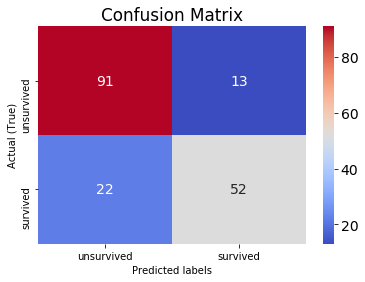

In [902]:
# ใช้ Seaborn Heat Map
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
plt.rcParams['figure.figsize'] = 5,4  # ขนาด
plt.rcParams.update({'font.size':14})  # ความสูงอักษร

cm = confusion_matrix(y_true, y_pred) # คำนวณค่า Confusion Matrix
# กราฟ heatmap เฉดสีออกโทน ฟ้า แดง
sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm")

y_targets = ['unsurvived', 'survived'] # Label กำกับ ถ้าไม่มีกำหนด จะแสดง 0 1

ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual (True)');
ax.set_title('Confusion Matrix'); # title
ax.xaxis.set_ticklabels(y_targets) # label กำกับแกน x
ax.yaxis.set_ticklabels(y_targets) # label กำกับแกน y
plt.show() 

#ใช้ scikitplot สร้าง 
#import scikitplot as skplot
#skplot.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
#plt.show()